In [239]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the csv file
df = pd.read_csv(".././docs/csv/results.csv")
df2 = pd.read_csv(".././docs/csv/results2.csv")

In [240]:
unique_df = {}

for value in df['label'].unique():
    # Filter the original DataFrame to get the rows with the current unique value
    new_df = df[df['label'] == value]
    
    # compute mean and standard deviation
    new_df = new_df.sort_values(by=['size'])
    new_df = new_df.groupby(['size']).agg({'time': ['mean', 'std']})
    new_df.columns = ['time', 'std']
    new_df = new_df.reset_index()
    
    # Store the new DataFrame in the dictionary with the unique value as the key
    unique_df[value] = new_df

# for unique combination of df['label'] and df['param']
for value in df2['label'].unique():
    # Filter the original DataFrame to get the rows with the current unique value
    new_df = df2[df2['label'] == value]
    
    # compute mean and standard deviation for each unique combination
    for param in new_df['param'].unique():
        new_df2 = new_df[new_df['param'] == param]
        new_df2 = new_df2.sort_values(by=['size'])
        new_df2 = new_df2.groupby(['size']).agg({'time': ['mean', 'std']})
        new_df2.columns = ['time', 'std']
        new_df2 = new_df2.reset_index()
    
        # Store the new DataFrame in the dictionary with the unique combination as the key
        unique_df[(value, param)] = new_df2

unique_df

{'python':    size           time       std
 0    32       0.005648  0.002063
 1    64       0.048004  0.006445
 2   128       0.366891  0.025504
 3   256       2.873940  0.025432
 4   512      24.524437  0.295540
 5  1024     221.705985  1.308298
 6  2048    2014.454849       NaN
 7  4096   18214.384031       NaN
 8  8192  164691.596770       NaN,
 'O0':    size         time       std
 0    32     0.000000  0.000000
 1    64     0.000800  0.000837
 2   128     0.006800  0.000837
 3   256     0.055600  0.003782
 4   512     0.415800  0.021123
 5  1024    22.786200  0.709160
 6  2048   178.711737       NaN
 7  4096  1336.480943       NaN
 8  8192  9994.762158       NaN,
 'O1':    size          time       std
 0    32      0.000000  0.000000
 1    64      0.000200  0.000447
 2   128      0.001800  0.000837
 3   256      0.033200  0.002168
 4   512      0.807200  0.004147
 5  1024     10.307400  0.119803
 6  2048    131.519438       NaN
 7  4096   1676.913472       NaN
 8  8192  21381.164

In [241]:
speedup_df = {}

for value in unique_df:
    df_speedup = unique_df[value].copy()
    df_speedup['speedup'] = unique_df['python']['time'] / unique_df[value]['time']
    df_speedup['std'] = df_speedup['speedup'] * np.sqrt((unique_df[value]['std'] / unique_df[value]['time'])**2 + (unique_df['python']['std'] / unique_df['python']['time'])**2)
    speedup_df[value] = df_speedup

In [242]:
def plot_df(label):
    plt.title(f'DGEMM execution time in {label}')
    plt.xlabel('Matrix Size (N x N)')
    plt.ylabel('Time (seconds)')
    plt.errorbar(unique_df[label]['size'], unique_df[label]['time'], yerr=unique_df[label]['std'], label=label)
    plt.show()

def plot_df2(label, param):
    plt.title(f'DGEMM execution time in {label} with {param}')
    plt.xlabel('Matrix Size (N x N)')
    plt.ylabel('Time (seconds)')
    plt.errorbar(unique_df[(label, param)]['size'], unique_df[(label, param)]['time'], yerr=unique_df[(label, param)]['std'], label=(label, param))
    plt.show()

def plot_speedup(label_n, label_1):
    # compute the speedup
    df_speedup = unique_df[label_1].copy()
    df_speedup['time'] = unique_df[label_1]['time'] / unique_df[label_n]['time']
    df_speedup['std'] = df_speedup['time'] * np.sqrt((unique_df[label_n]['std'] / unique_df[label_n]['time'])**2 + (unique_df[label_1]['std'] / unique_df[label_1]['time'])**2)

    # plot the speedup graph
    plt.title('DGEMM speedup in C over Python')
    plt.xlabel('Matrix Size (N x N)')
    plt.ylabel('Speedup')
    plt.errorbar(df_speedup['size'], df_speedup['time'], yerr=df_speedup['std'], label='speedup')
    plt.show()


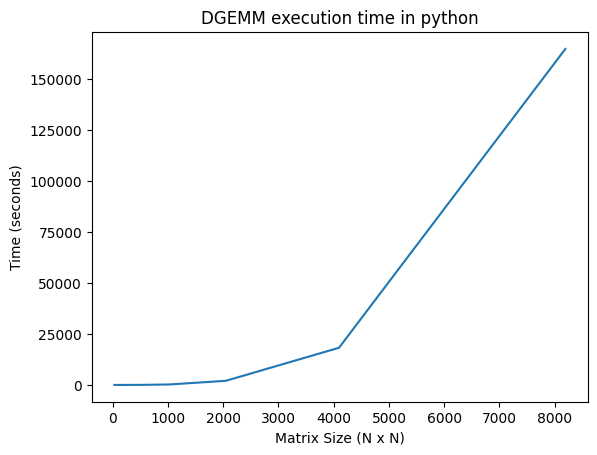

In [243]:
plot_df('python')

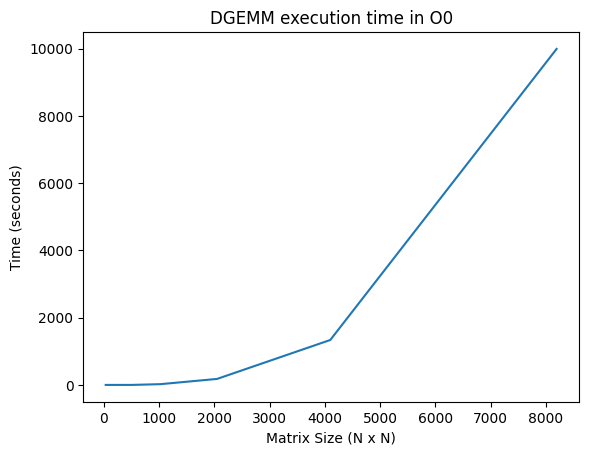

In [244]:
plot_df('O0')


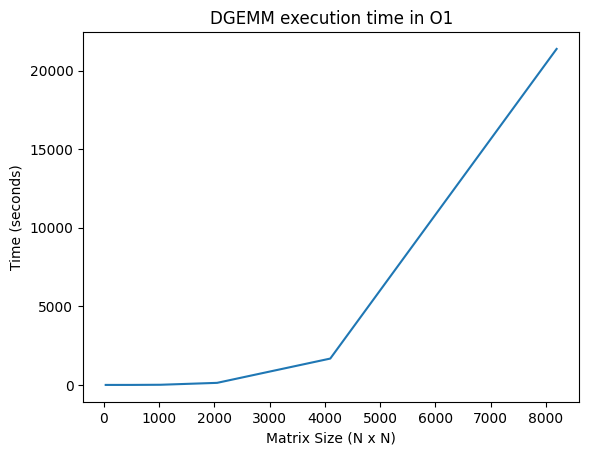

In [245]:
plot_df('O1')


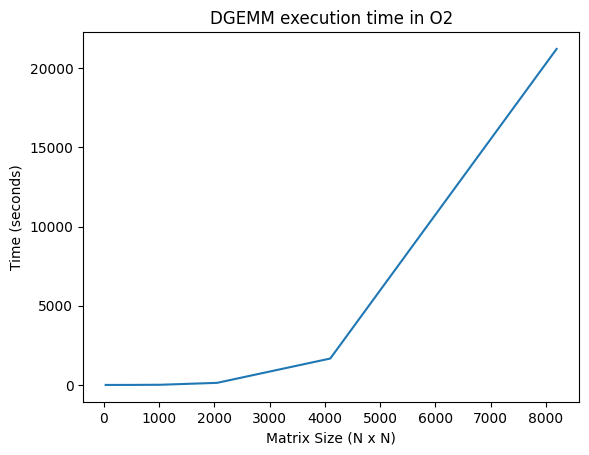

In [246]:
plot_df('O2')


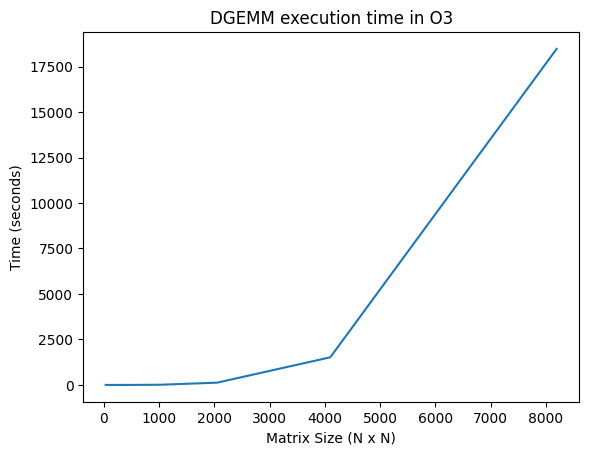

In [247]:
plot_df('O3')


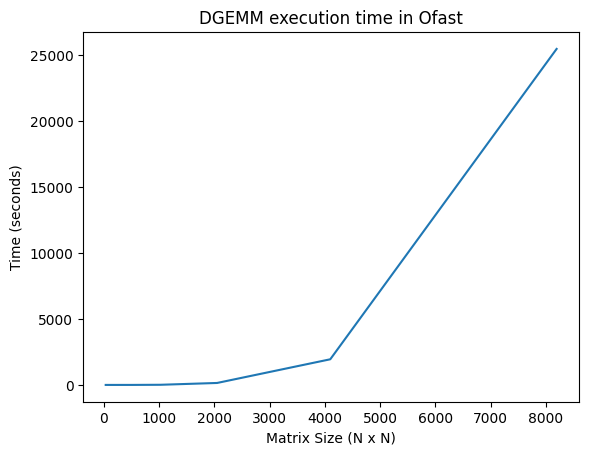

In [248]:
plot_df('Ofast')


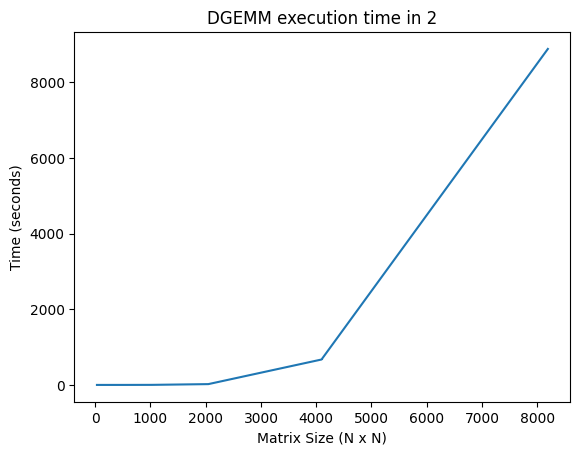

In [249]:
plot_df('2')

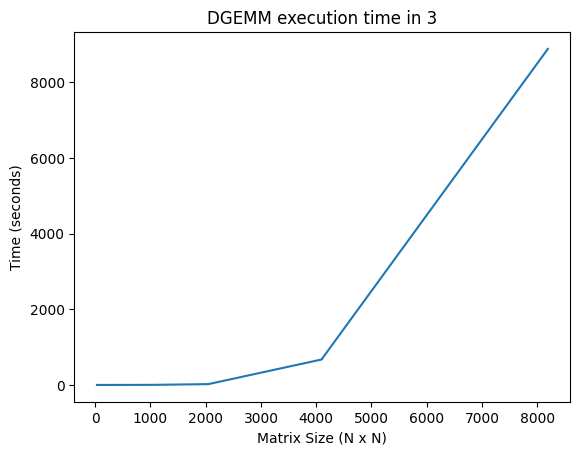

In [250]:
plot_df('3')

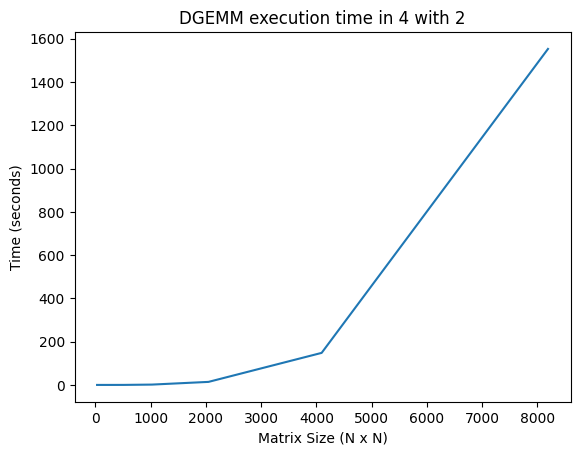

In [251]:
plot_df2(4, 2)

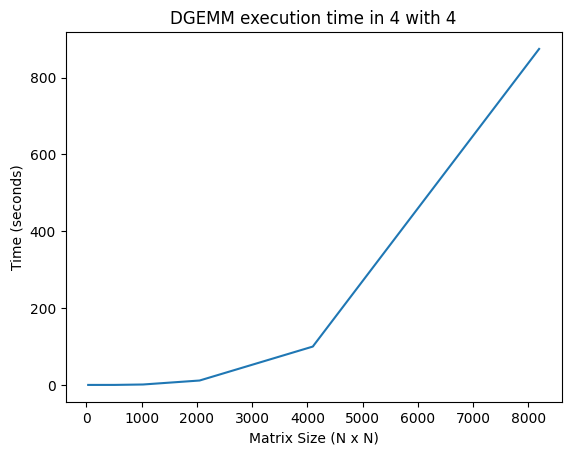

In [252]:
plot_df2(4, 4)

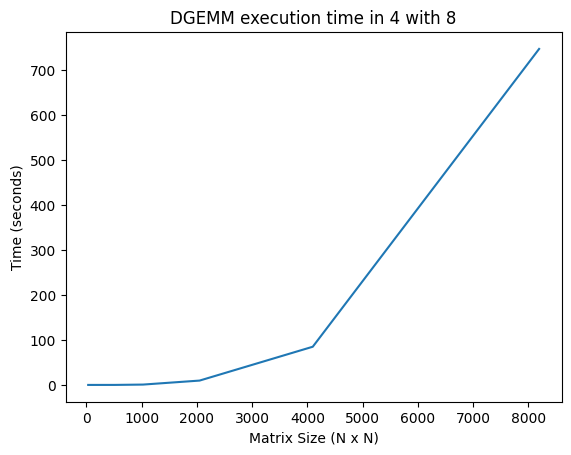

In [253]:
plot_df2(4, 8)

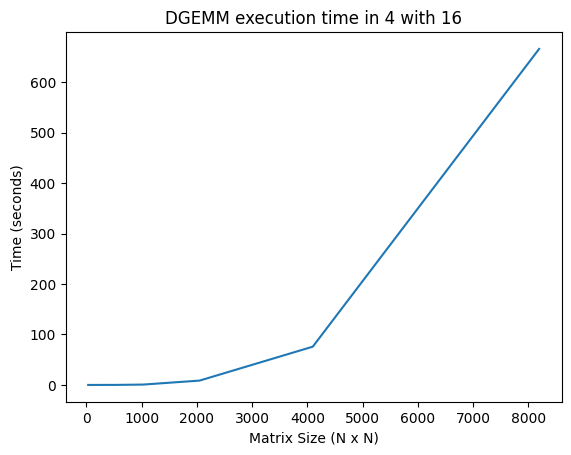

In [254]:
plot_df2(4, 16)

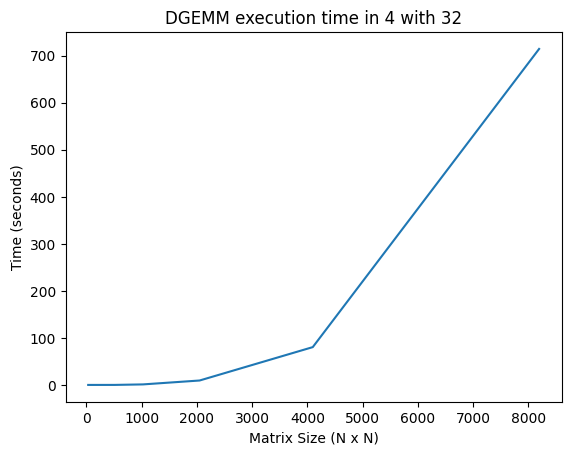

In [255]:
plot_df2(4, 32)

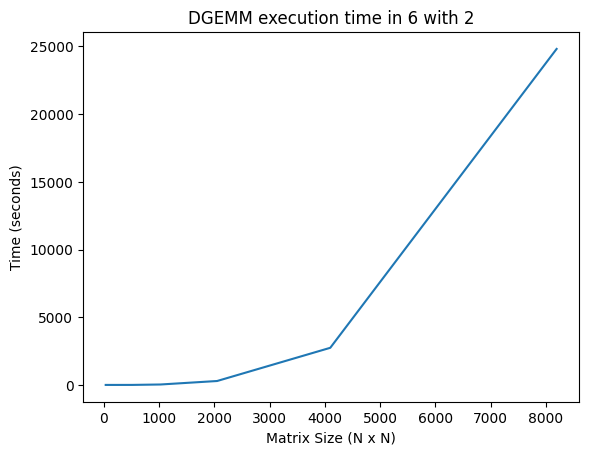

In [256]:
plot_df2(6, 2)

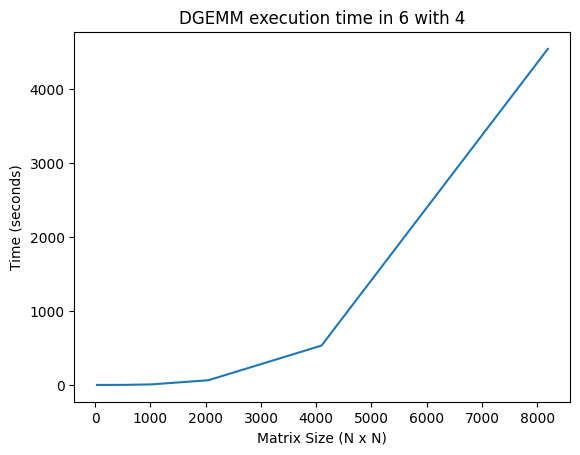

In [257]:
plot_df2(6, 4)

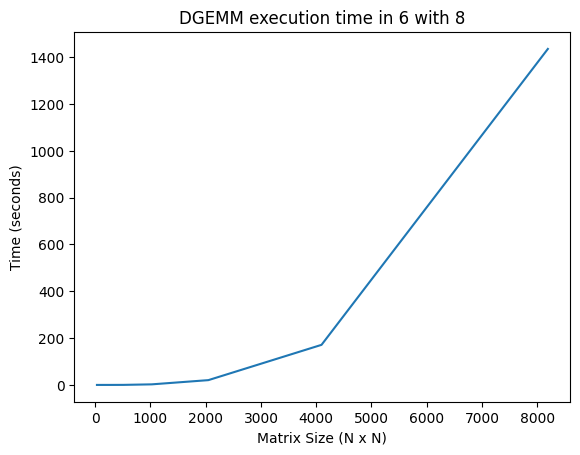

In [258]:
plot_df2(6, 8)

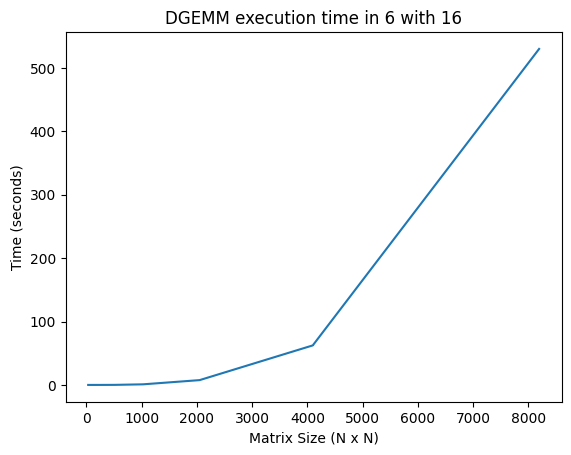

In [259]:
plot_df2(6, 16)

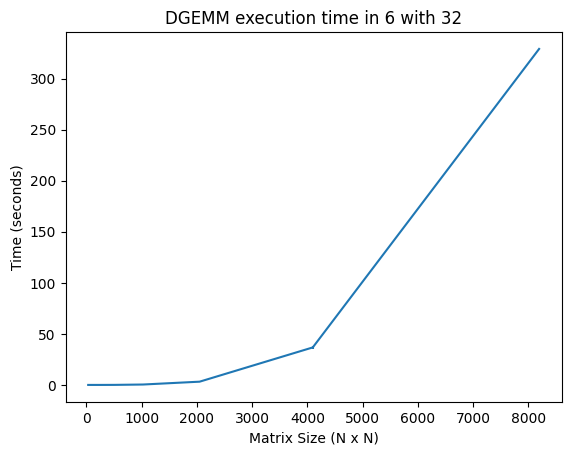

In [260]:
plot_df2(6, 32)

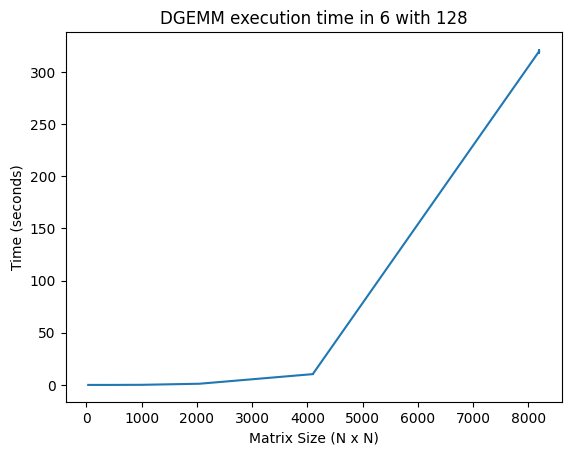

In [261]:
plot_df2(6, 128)

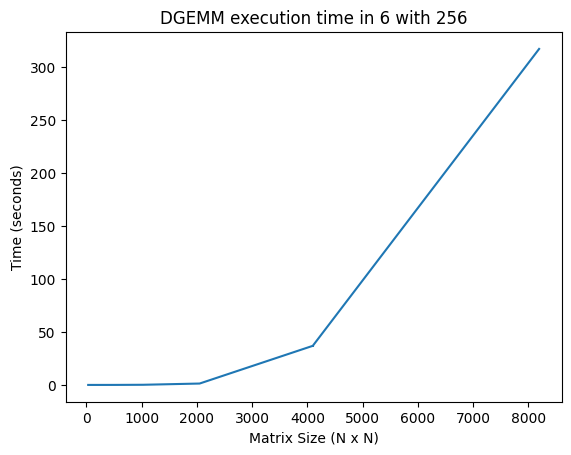

In [262]:
plot_df2(6, 256)

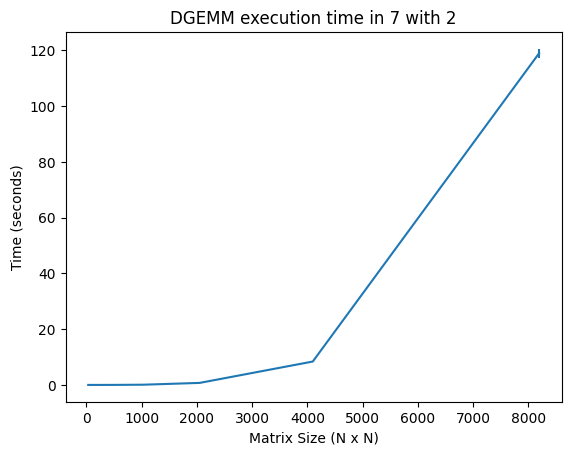

In [263]:
plot_df2(7, 2)

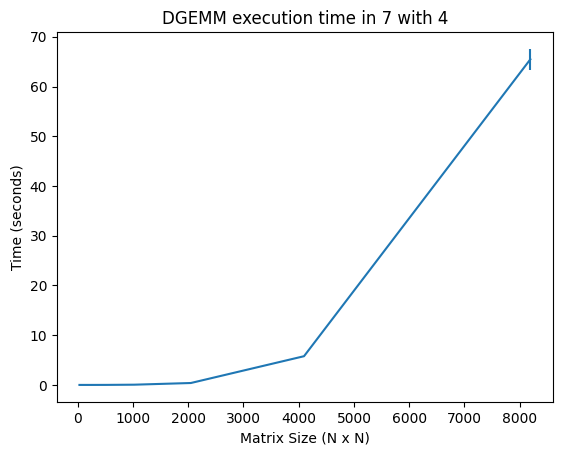

In [264]:
plot_df2(7, 4)

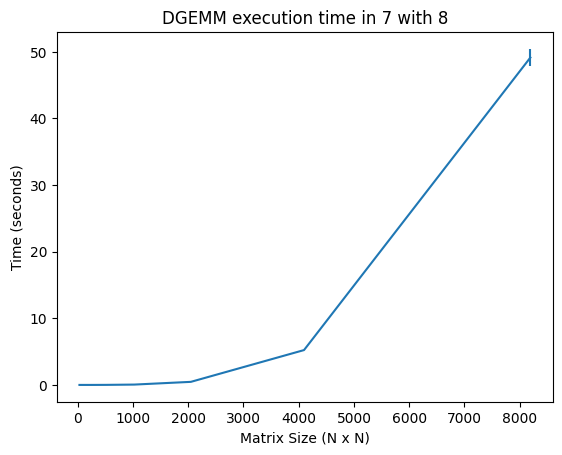

In [265]:
plot_df2(7, 8)

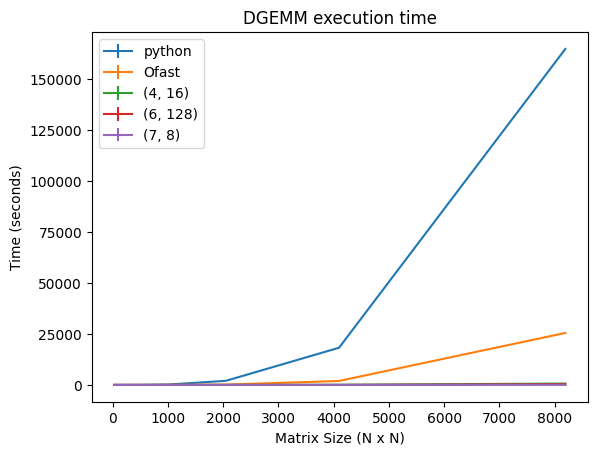

In [266]:
# plot the graphs together

plt.title('DGEMM execution time')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.errorbar(unique_df['python']['size'], unique_df['python']['time'], yerr=unique_df['python']['std'], label='python')
plt.errorbar(unique_df['Ofast']['size'], unique_df['Ofast']['time'], yerr=unique_df['Ofast']['std'], label='Ofast')
plt.errorbar(unique_df[(4, 16)]['size'], unique_df[(4, 16)]['time'], yerr=unique_df[(4, 16)]['std'], label=(4, 16))
plt.errorbar(unique_df[(6, 128)]['size'], unique_df[(6, 128)]['time'], yerr=unique_df[(6, 128)]['std'], label=(6, 128))
plt.errorbar(unique_df[(7, 8)]['size'], unique_df[(7, 8)]['time'], yerr=unique_df[(7, 8)]['std'], label=(7, 8))
plt.legend()
plt.show()

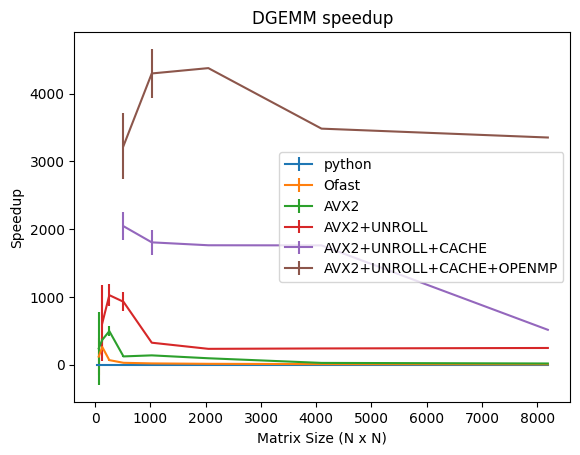

In [267]:
# plot the speedup graphs together

plt.title('DGEMM speedup')
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Speedup')
plt.errorbar(speedup_df['python']['size'], speedup_df['python']['speedup'], yerr=speedup_df['python']['std'], label='python')
plt.errorbar(speedup_df['Ofast']['size'], speedup_df['Ofast']['speedup'], yerr=speedup_df['Ofast']['std'], label='Ofast')
plt.errorbar(speedup_df['3']['size'], speedup_df['3']['speedup'], yerr=speedup_df['3']['std'], label='AVX2')
plt.errorbar(speedup_df[(4, 16)]['size'], speedup_df[(4, 16)]['speedup'], yerr=speedup_df[(4, 16)]['std'], label='AVX2+UNROLL')
plt.errorbar(speedup_df[(6, 128)]['size'], speedup_df[(6, 128)]['speedup'], yerr=speedup_df[(6, 128)]['std'], label='AVX2+UNROLL+CACHE')
plt.errorbar(speedup_df[(7, 8)]['size'], speedup_df[(7, 8)]['speedup'], yerr=speedup_df[(7, 8)]['std'], label='AVX2+UNROLL+CACHE+OPENMP')
plt.legend()
plt.show()